In [23]:
import pandas as pd
from venn import venn
import seaborn as sns

In [26]:
sv_df = pd.read_csv("../genomic_data/Raw_SV_ALL.csv", sep="\t").drop_duplicates()
sv_df = sv_df[(sv_df['Key'].str.contains('_Somatic')) & (sv_df['Name'].str.contains('JFCF'))]
# sv_df = sv_df[sv_df['Impact'].isin(['HIGH', 'MODERATE'])]
sv_df_new = pd.read_csv("../immortal_simon/gridss/DATA_GRIDSS.tsv", sep="\t").drop_duplicates()
sv_df_new = sv_df_new[sv_df_new['Key'].str.contains('_Somatic')]
# sv_df_new = sv_df_new[sv_df_new['Impact'].isin(['HIGH', 'MODERATE'])]

In [3]:
sv_df_new.head()

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,...,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2
0,SV_GRIDSS_HIGH_RNR2_Mortal_chrM_2553_2554_chr8...,JFCF_6,GRIDSS,False,Translocations,chrM,2553-2554,chr8,24130087-24130088,NotSplit:216.24;Split:43.18,...,NaN,NotSplit:13;Split:2,NotSplit:13;Split:2,RNR2,transcript_ablation,HIGH,T,T[CHR8:24130088[,T,]CHRM:2554]T
1,SV_GRIDSS_LOW_NULL_Mortal_chrM_2553_2554_chr8_...,JFCF_6,GRIDSS,False,Translocations,chrM,2553-2554,chr8,24130087-24130088,NotSplit:216.24;Split:43.18,...,NaN,NotSplit:13;Split:2,NotSplit:13;Split:2,NaN,feature_fusion,LOW,T,T[CHR8:24130088[,T,]CHRM:2554]T
2,SV_GRIDSS_HIGH_RNR2_Immortal_chrM_2553_2554_ch...,JFCF_6_T_1_M,GRIDSS,False,Translocations,chrM,2553-2554,chr8,24130087-24130088,NotSplit:216.24;Split:43.18,...,NaN,NotSplit:13;Split:2,NotSplit:13;Split:2,RNR2,transcript_ablation,HIGH,T,T[CHR8:24130088[,T,]CHRM:2554]T
3,SV_GRIDSS_LOW_NULL_Immortal_chrM_2553_2554_chr...,JFCF_6_T_1_M,GRIDSS,False,Translocations,chrM,2553-2554,chr8,24130087-24130088,NotSplit:216.24;Split:43.18,...,NaN,NotSplit:13;Split:2,NotSplit:13;Split:2,NaN,feature_fusion,LOW,T,T[CHR8:24130088[,T,]CHRM:2554]T
4,SV_GRIDSS_HIGH_CBWD1_Mortal_chrM_6420_6421_chr...,JFCF_6,GRIDSS,False,Translocations,chrM,6420-6421,chr9,129766-129767,NotSplit:139.36;Split:252.41,...,NaN,NotSplit:8;Split:11,NotSplit:8;Split:11,CBWD1,transcript_ablation,HIGH,C,CAAAAAAAA]CHR9:129767],A,ATTTTTTTT]CHRM:6421]


In [22]:
sv_df_new[sv_df_new['Gene']=='ATRX']

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,...,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2
119200,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76885052_7688...,JFCF_6_T_1_M,GRIDSS,False,Duplication,chrX,76885052-76885055,chrX,76923999-76924002,NotSplit:204.12;Split:318.66,...,NaN,NotSplit:11;Split:12,NotSplit:11;Split:12,ATRX,gene_fusion&frameshift_variant,HIGH,G,]CHRX:76924001]G,A,A[CHRX:76885054[
193720,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76808603_7680...,JFCF_6_T_1_Q,GRIDSS,False,Deletion,chrX,76808603-76808606,chrX,76875533-76875536,NotSplit:141.33;Split:96.28,...,NaN,NotSplit:8;Split:4,NotSplit:8;Split:4,ATRX,gene_fusion&frameshift_variant,HIGH,C,C[CHRX:76875535[,C,]CHRX:76808605]C
354334,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76862268_7686...,JFCF_6_T_1_D,GRIDSS,False,Deletion,chrX,76862268-76862269,chrX,77034579-77034580,NotSplit:249.27;Split:0,...,NaN,NotSplit:14;Split:0,NotSplit:14;Split:0,ATRX,gene_fusion&frameshift_variant,HIGH,A,AGGTA[CHRX:77034580[,T,]CHRX:76862269]GGTAT
748718,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76853017_7685...,JFCF_6_T_1J_11E,GRIDSS,False,Deletion,chrX,76853017-76853018,chrX,77014863-77014864,NotSplit:239.33;Split:302.85,...,NaN,NotSplit:13;Split:12,NotSplit:13;Split:12,ATRX,gene_fusion&frameshift_variant,HIGH,A,A[CHRX:77014864[,A,]CHRX:76853018]A
821329,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76853017_7685...,JFCF_6_T_1J_1_3C,GRIDSS,False,Deletion,chrX,76853017-76853018,chrX,77014863-77014864,NotSplit:343.72;Split:285.82,...,NaN,NotSplit:19;Split:11,NotSplit:19;Split:11,ATRX,gene_fusion&frameshift_variant,HIGH,A,A[CHRX:77014864[,A,]CHRX:76853018]A
967784,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76795540_7679...,JFCF_6_T_1_L,GRIDSS,False,Deletion,chrX,76795540-76795542,chrX,76940486-76940488,NotSplit:237.43;Split:194.13,...,NaN,NotSplit:13;Split:7,NotSplit:13;Split:7,ATRX,gene_fusion,HIGH,T,T[CHRX:76940487[,C,]CHRX:76795541]C
1200011,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76788737_7678...,JFCF_6_T_1_R,GRIDSS,False,Deletion,chrX,76788737-76788738,chrX,76876903-76876904,NotSplit:186.78;Split:0,...,NaN,NotSplit:10;Split:0,NotSplit:10;Split:0,ATRX,gene_fusion&frameshift_variant,HIGH,G,GTAGCTGGGATTAC[CHRX:76876904[,A,]CHRX:76788738]TAGCTGGGATTACA
1352382,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76783771_7678...,JFCF_6_T_5K,GRIDSS,False,Duplication,chrX,76783771-76783774,chrX,76840055-76840058,NotSplit:256.58;Split:114.96,...,NaN,NotSplit:14;Split:4,NotSplit:14;Split:4,ATRX,gene_fusion&frameshift_variant,HIGH,T,]CHRX:76840057]T,C,C[CHRX:76783773[
1352384,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76798390_7679...,JFCF_6_T_5K,GRIDSS,False,Deletion,chrX,76798390-76798391,chrX,76799297-76799298,NotSplit:256.58;Split:30.98,...,NaN,NotSplit:14;Split:1,NotSplit:14;Split:1,ATRX,gene_fusion,HIGH,T,T[CHRX:76799298[,G,]CHRX:76798391]G


In [21]:
sv_df[(sv_df['Gene']=='ATRX') & (sv_df['Name'].str.contains('JFCF'))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,...,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2
229106,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76885052_7688...,JFCF_6_T_1_M,GRIDSS,False,Duplication,chrX,76885052-76885055,chrX,76923999-76924002,NotSplit:204.12;Split:318.66,...,NaN,NotSplit:11;Split:12,NotSplit:11;Split:12,ATRX,gene_fusion&frameshift_variant,HIGH,A,]CHRX:76924002]A,G,G[CHRX:76885055[
243524,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76808603_7680...,JFCF_6_T_1_Q,GRIDSS,False,Deletion,chrX,76808603-76808606,chrX,76875533-76875536,NotSplit:141.33;Split:96.28,...,NaN,NotSplit:8;Split:4,NotSplit:8;Split:4,ATRX,gene_fusion&frameshift_variant,HIGH,C,C[CHRX:76875536[,C,]CHRX:76808606]C
290332,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76862268_7686...,JFCF_6_T_1_D,GRIDSS,False,Deletion,chrX,76862268-76862269,chrX,77034579-77034580,NotSplit:249.27;Split:0,...,NaN,NotSplit:14;Split:0,NotSplit:14;Split:0,ATRX,gene_fusion&frameshift_variant,HIGH,A,AGGTA[CHRX:77034580[,T,]CHRX:76862269]GGTAT
367075,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76853017_7685...,JFCF_6_T_1J_11E,GRIDSS,False,Deletion,chrX,76853017-76853018,chrX,77014863-77014864,NotSplit:239.32;Split:302.85,...,NaN,NotSplit:13;Split:12,NotSplit:13;Split:12,ATRX,gene_fusion&frameshift_variant,HIGH,A,A[CHRX:77014864[,A,]CHRX:76853018]A
383256,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76853017_7685...,JFCF_6_T_1J_1_3C,GRIDSS,False,Deletion,chrX,76853017-76853018,chrX,77014863-77014864,NotSplit:343.72;Split:285.82,...,NaN,NotSplit:19;Split:11,NotSplit:19;Split:11,ATRX,gene_fusion&frameshift_variant,HIGH,A,A[CHRX:77014864[,A,]CHRX:76853018]A
414295,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76795540_7679...,JFCF_6_T_1_L,GRIDSS,False,Deletion,chrX,76795540-76795542,chrX,76940486-76940488,NotSplit:237.43;Split:213.13,...,NaN,NotSplit:13;Split:8,NotSplit:13;Split:8,ATRX,gene_fusion,HIGH,T,T[CHRX:76940487[,C,]CHRX:76795541]C
459731,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76788737_7678...,JFCF_6_T_1_R,GRIDSS,False,Deletion,chrX,76788737-76788738,chrX,76876903-76876904,NotSplit:186.78;Split:0,...,NaN,NotSplit:10;Split:0,NotSplit:10;Split:0,ATRX,gene_fusion&frameshift_variant,HIGH,G,GTAGCTGGGATTAC[CHRX:76876904[,A,]CHRX:76788738]TAGCTGGGATTACA
489016,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76783771_7678...,JFCF_6_T_5K,GRIDSS,False,Duplication,chrX,76783771-76783774,chrX,76840055-76840058,NotSplit:256.58;Split:114.96,...,NaN,NotSplit:14;Split:4,NotSplit:14;Split:4,ATRX,gene_fusion&frameshift_variant,HIGH,T,]CHRX:76840058]T,T,T[CHRX:76783774[
489018,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76798390_7679...,JFCF_6_T_5K,GRIDSS,False,Deletion,chrX,76798390-76798391,chrX,76799297-76799298,NotSplit:256.58;Split:129.98,...,NaN,NotSplit:14;Split:7,NotSplit:14;Split:7,ATRX,gene_fusion,HIGH,T,T[CHRX:76799298[,G,]CHRX:76798391]G


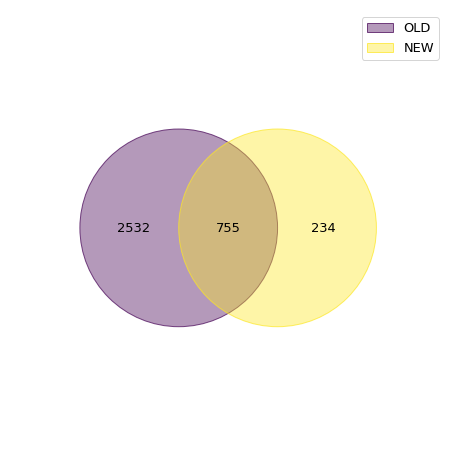

In [16]:
mutations = {
    'OLD': set(sv_df['Key']),
    'NEW': set(sv_df_new['Key'])
}
venn(mutations)

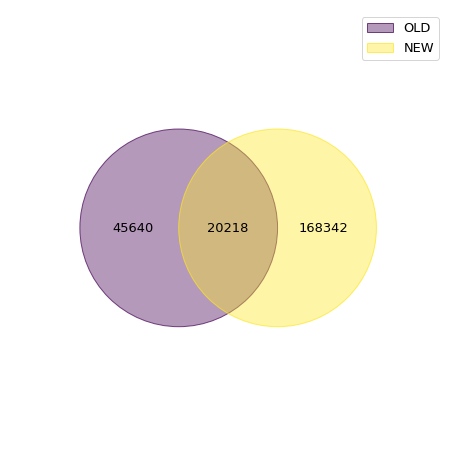

In [12]:
mutations = {
    'OLD': set(sv_df['Key']),
    'NEW': set(sv_df_new['Key'])
}
venn(mutations)

[Text(0, 0, 'JFCF_6_T_1_M'),
 Text(0, 0, 'JFCF_6_T_1_Q'),
 Text(0, 0, 'JFCF_6_P_pLKO_5'),
 Text(0, 0, 'JFCF_6_T_1_C'),
 Text(0, 0, 'JFCF_6_T_1_D'),
 Text(0, 0, 'JFCF_6_T_1_F'),
 Text(0, 0, 'JFCF_6_T_1_G'),
 Text(0, 0, 'JFCF_6_T_1_H'),
 Text(0, 0, 'JFCF_6_T_1J_11C'),
 Text(0, 0, 'JFCF_6_T_1J_11E'),
 Text(0, 0, 'JFCF_6_T_1J_1_3C'),
 Text(0, 0, 'JFCF_6_T_1J_6B'),
 Text(0, 0, 'JFCF_6_T_1_L'),
 Text(0, 0, 'JFCF_6_T_1_P_ALT'),
 Text(0, 0, 'JFCF_6_T_1_P_TEL'),
 Text(0, 0, 'JFCF_6_T_1_R'),
 Text(0, 0, 'JFCF_6_T_2H'),
 Text(0, 0, 'JFCF_6_T_5K')]

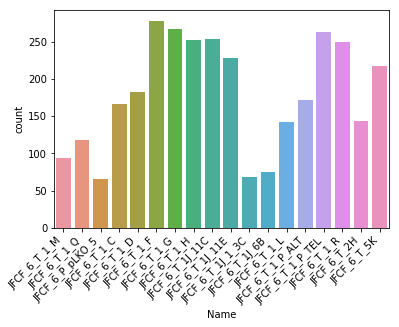

In [29]:
chart = sns.countplot(x='Name', data=sv_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'JFCF_6_T_1_M'),
 Text(0, 0, 'JFCF_6_T_1_Q'),
 Text(0, 0, 'JFCF_6_T_1_C'),
 Text(0, 0, 'JFCF_6_T_1_D'),
 Text(0, 0, 'JFCF_6_T_1_F'),
 Text(0, 0, 'JFCF_6_T_1_G'),
 Text(0, 0, 'JFCF_6_T_1_H'),
 Text(0, 0, 'JFCF_6_T_1J_11C'),
 Text(0, 0, 'JFCF_6_T_1J_11E'),
 Text(0, 0, 'JFCF_6_T_1J_1_3C'),
 Text(0, 0, 'JFCF_6_T_1J_6B'),
 Text(0, 0, 'JFCF_6_T_1_L'),
 Text(0, 0, 'JFCF_6_T_1_P_ALT'),
 Text(0, 0, 'JFCF_6_T_1_P_TEL'),
 Text(0, 0, 'JFCF_6_T_1_R'),
 Text(0, 0, 'JFCF_6_T_2H'),
 Text(0, 0, 'JFCF_6_T_5K')]

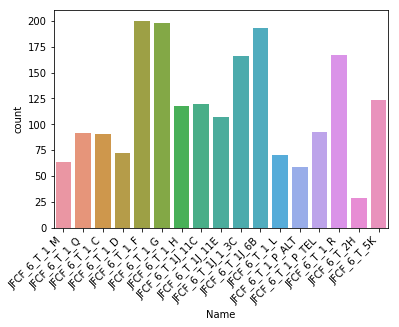

In [28]:
chart = sns.countplot(x='Name', data=sv_df_new)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')